## Company Bankruptcy Prediction

In [45]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(mlr)           # ML toolkit
library(caret)         # ML toolkit
library(nnet)          # class.ind() function
library(neuralnet)     # Deep Neural Networks
library(LiblineaR)     # LR Lasso (l1)
library(randomForest)  # Random Forest
library(adabag)        # Boosting
library(e1071)         # SVM
library(ggplot2)       # Visualization
library(plotly)        # 3D visualization
library(class)
library(tree)

# Import data
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations

In [2]:
data <- read.csv("./data/bankruptcy_prediction/data.csv", header=T, stringsAsFactors=F)

In [3]:
# Check the dataset
dim(data)
head(data)

[1] 6819   96

,Bankrupt.,ROA.C..before.interest.and.depreciation.before.interest,ROA.A..before.interest.and...after.tax,ROA.B..before.interest.and.depreciation.after.tax,Operating.Gross.Margin,Realized.Sales.Gross.Margin,Operating.Profit.Rate,Pre.tax.net.Interest.Rate,After.tax.net.Interest.Rate,Non.industry.income.and.expenditure.revenue,⋯,Net.Income.to.Total.Assets,Total.assets.to.GNP.price,No.credit.Interval,Gross.Profit.to.Sales,Net.Income.to.Stockholder.s.Equity,Liability.to.Equity,Degree.of.Financial.Leverage..DFL.,Interest.Coverage.Ratio..Interest.expense.to.EBIT.,Net.Income.Flag,Equity.to.Liability
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1,0.3705943,0.4243894,0.4057498,0.6014572,0.6014572,0.9989692,0.7968871,0.8088094,0.3026464,⋯,0.7168453,0.009219440,0.6228790,0.6014533,0.8278902,0.2902019,0.02660063,0.5640501,1,0.01646874
2,1,0.4642909,0.5382141,0.5167300,0.6102351,0.6102351,0.9989460,0.7973802,0.8093007,0.3035564,⋯,0.7952971,0.008323302,0.6236517,0.6102365,0.8399693,0.2838460,0.26457682,0.5701749,1,0.02079431
3,1,0.4260713,0.4990188,0.4722951,0.6014500,0.6013635,0.9988574,0.7964034,0.8083875,0.3020352,⋯,0.7746697,0.040002853,0.6238410,0.6014493,0.8367743,0.2901885,0.02655472,0.5637061,1,0.01647411
4,1,0.3998440,0.4512647,0.4577333,0.5835411,0.5835411,0.9986997,0.7969670,0.8089656,0.3033495,⋯,0.7395545,0.003252475,0.6229287,0.5835376,0.8346971,0.2817212,0.02669663,0.5646634,1,0.02398233
5,1,0.4650222,0.5384322,0.5222978,0.5987835,0.5987835,0.9989731,0.7973661,0.8093037,0.3034750,⋯,0.7950159,0.003877563,0.6235207,0.5987815,0.8399727,0.2785138,0.02475185,0.5756166,1,0.03549020
6,1,0.3886803,0.4151766,0.4191338,0.5901714,0.5902507,0.9987581,0.7969032,0.8087706,0.3031158,⋯,0.7104205,0.005277875,0.6226046,0.5901723,0.8299390,0.2850871,0.02667537,0.5645383,1,0.01953448


In [4]:
# Check the response
table(data$Bankrupt)
round(table(data$Bankrupt) / nrow(data), 2)


   0    1 
6599  220 


   0    1 
0.97 0.03 

In [5]:
# Check missing values
print(paste("Total NAs:", sum(apply(is.na(data), 2, sum))))
apply(is.na(data), 2, sum)

[1] "Total NAs: 0"


Bankrupt. 
                                                      0 
ROA.C..before.interest.and.depreciation.before.interest 
                                                      0 
                 ROA.A..before.interest.and...after.tax 
                                                      0 
      ROA.B..before.interest.and.depreciation.after.tax 
                                                      0 
                                 Operating.Gross.Margin 
                                                      0 
                            Realized.Sales.Gross.Margin 
                                                      0 
                                  Operating.Profit.Rate 
                                                      0 
                              Pre.tax.net.Interest.Rate 
                                                      0 
                            After.tax.net.Interest.Rate 
                                                      0 
            Non.industry.income.and.expenditure.revenue 
                                                      0 
                   Continuous.interest.rate..after.tax. 
                                                      0 
                                 Operating.Expense.Rate 
                                                      0 
                  Research.and.development.expense.rate 
                                                      0 
                                         Cash.flow.rate 
                                                      0 
                    Interest.bearing.debt.interest.rate 
                                                      0 
                                           Tax.rate..A. 
                                                      0 
                                Net.Value.Per.Share..B. 
                                                      0 
                                Net.Value.Per.Share..A. 
                                                      0 
                                Net.Value.Per.Share..C. 
                                                      0 
                Persistent.EPS.in.the.Last.Four.Seasons 
                                                      0 
                                    Cash.Flow.Per.Share 
                                                      0 
                            Revenue.Per.Share..Yuan.Â.. 
                                                      0 
                   Operating.Profit.Per.Share..Yuan.Â.. 
                                                      0 
              Per.Share.Net.profit.before.tax..Yuan.Â.. 
                                                      0 
                Realized.Sales.Gross.Profit.Growth.Rate 
                                                      0 
                           Operating.Profit.Growth.Rate 
                                                      0 
                       After.tax.Net.Profit.Growth.Rate 
                                                      0 
                         Regular.Net.Profit.Growth.Rate 
                                                      0 
                      Continuous.Net.Profit.Growth.Rate 
                                                      0 
                                Total.Asset.Growth.Rate 
                                                      0 
                                  Net.Value.Growth.Rate 
                                                      0 
                   Total.Asset.Return.Growth.Rate.Ratio 
                                                      0 
                                    Cash.Reinvestment.. 
                                                      0 
                                          Current.Ratio 
                                                      0 
                                            Quick.Ratio 
                                                      0 
                                 Interest.Expense.Ratio 

In [6]:
# Data description
str(data)

'data.frame':	6819 obs. of  96 variables:
 $ Bankrupt.                                              : int  1 1 1 1 1 1 0 0 0 0 ...
 $ ROA.C..before.interest.and.depreciation.before.interest: num  0.371 0.464 0.426 0.4 0.465 ...
 $ ROA.A..before.interest.and...after.tax                 : num  0.424 0.538 0.499 0.451 0.538 ...
 $ ROA.B..before.interest.and.depreciation.after.tax      : num  0.406 0.517 0.472 0.458 0.522 ...
 $ Operating.Gross.Margin                                 : num  0.601 0.61 0.601 0.584 0.599 ...
 $ Realized.Sales.Gross.Margin                            : num  0.601 0.61 0.601 0.584 0.599 ...
 $ Operating.Profit.Rate                                  : num  0.999 0.999 0.999 0.999 0.999 ...
 $ Pre.tax.net.Interest.Rate                              : num  0.797 0.797 0.796 0.797 0.797 ...
 $ After.tax.net.Interest.Rate                            : num  0.809 0.809 0.808 0.809 0.809 ...
 $ Non.industry.income.and.expenditure.revenue            : num  0.303 0.304 0.30

In [7]:
# Split the data into train/test
set.seed(1)
train_idx <- sample(1:nrow(data), nrow(data)*0.8)
data_train <- data[train_idx, ]  # 80%
data_test <- data[-train_idx, ]  # 20%

In [8]:
print(dim(data_train))
print(dim(data_test))

[1] 5455   96
[1] 1364   96


#### Train the Neural Network model

In [9]:
#2 Train the neural network model
nn_md <- neuralnet(Bankrupt. ~.,          # The formula, all the variables
                   data_train,             # Training data
                   hidden=c(30),  # Size of the hidden layers
                   stepmax=100000,        # Maximum training step before stopping
                   rep=1,                 # Number of training repeat
                   #lifesign='full',       # Print during train
                   #algorithm='backprop',  # Algorithm to calculate the network (backpropagation)
                   #learningrate=0.01,     # Learning rate
                   #err.fct='ce',          # Error function, cross-entropy
                   act.fct="logistic",    # Function use to calculate the result (activation function)
                   linear.output=F        # FALSE = apply activation function to output layer
                  )

#### Plot the neural networks model

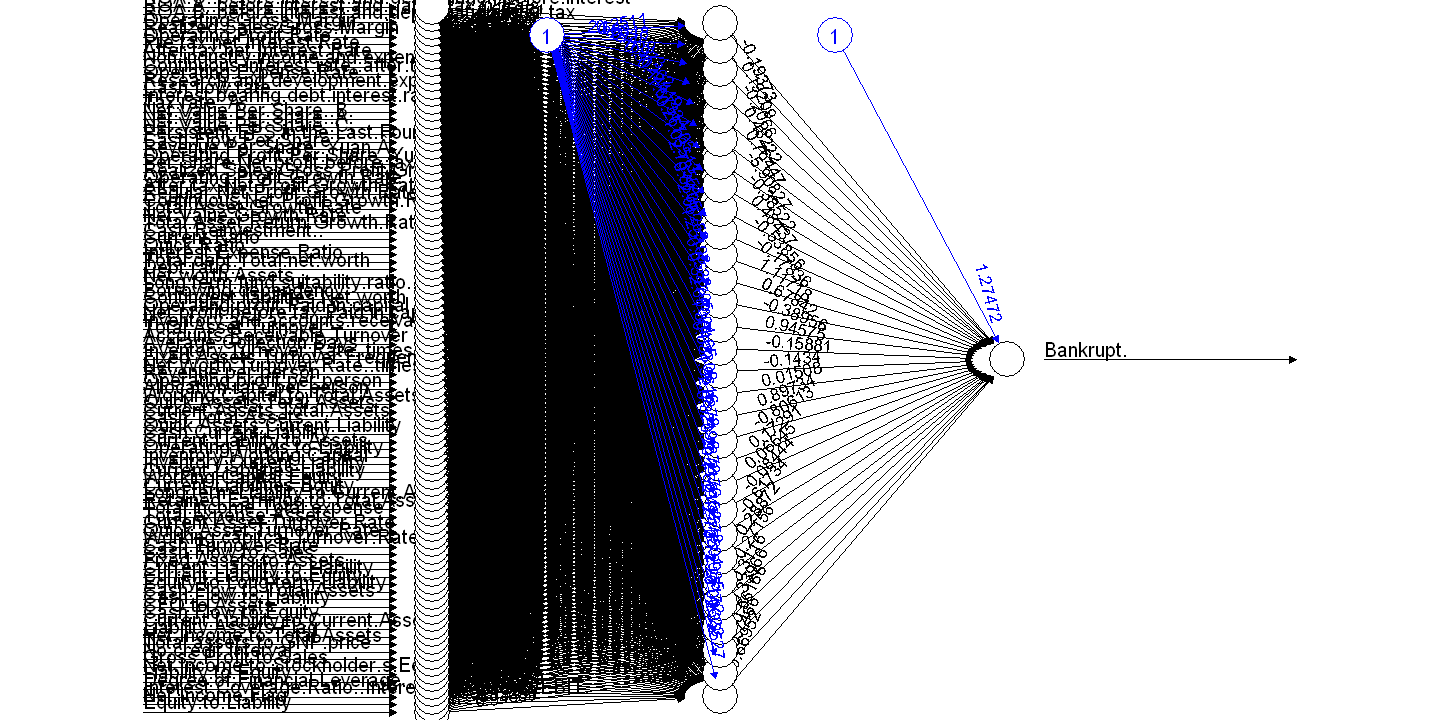

In [10]:
# Plot the neural network
options(repr.plot.width=12, repr.plot.height=6)
par(cex.lab=0.8, cex.axis=0.8, cex.main=0.8, cex.sub=0.8)

plot(nn_md, rep="best")

In [11]:
# Make prediction and evaluation on train set
train_pred <- predict(nn_md, data[train_idx, ])
train_pred <- apply(train_pred, 1, which.max)

table(data[train_idx, ]$Bankrupt., train_pred)

   train_pred
       1
  0 5279
  1  176

In [12]:
# Make prediction and evaluation on test set
test_pred <- predict(nn_md, data[-train_idx, ])
test_pred <- apply(test_pred, 1, which.max)

table(data[-train_idx, ]$Bankrupt., test_pred)

   test_pred
       1
  0 1320
  1   44

In [67]:
# Error Rate
nn_md$result.matrix

error,8.434159e+01
reached.threshold,9.914824e-03
steps,3.660000e+03
Intercept.to.1layhid1,2.510994e-01
ROA.C..before.interest.and.depreciation.before.interest.to.1layhid1,1.282679e+00
ROA.A..before.interest.and...after.tax.to.1layhid1,-2.517066e-01
ROA.B..before.interest.and.depreciation.after.tax.to.1layhid1,5.950507e-01
Operating.Gross.Margin.to.1layhid1,5.190360e-01
Realized.Sales.Gross.Margin.to.1layhid1,1.234120e+00
Operating.Profit.Rate.to.1layhid1,-1.703897e+00
Pre.tax.net.Interest.Rate.to.1layhid1,1.963030e+00


In [14]:
# 3 Train the neural network model
nn_md1 <- neuralnet(Bankrupt. ~.,          # The formula, all the variables
                   data_train,             # Training data
                   hidden=c(30,30,30),  # Size of the hidden layers
                   stepmax=100000,        # Maximum training step before stopping
                   rep=1,                 # Number of training repeat
                   #lifesign='full',       # Print during train
                   #algorithm='backprop',  # Algorithm to calculate the network (backpropagation)
                   #learningrate=0.01,     # Learning rate
                   #err.fct='ce',          # Error function, cross-entropy
                   act.fct="logistic",    # Function use to calculate the result (activation function)
                   linear.output=F        # FALSE = apply activation function to output layer
                  )

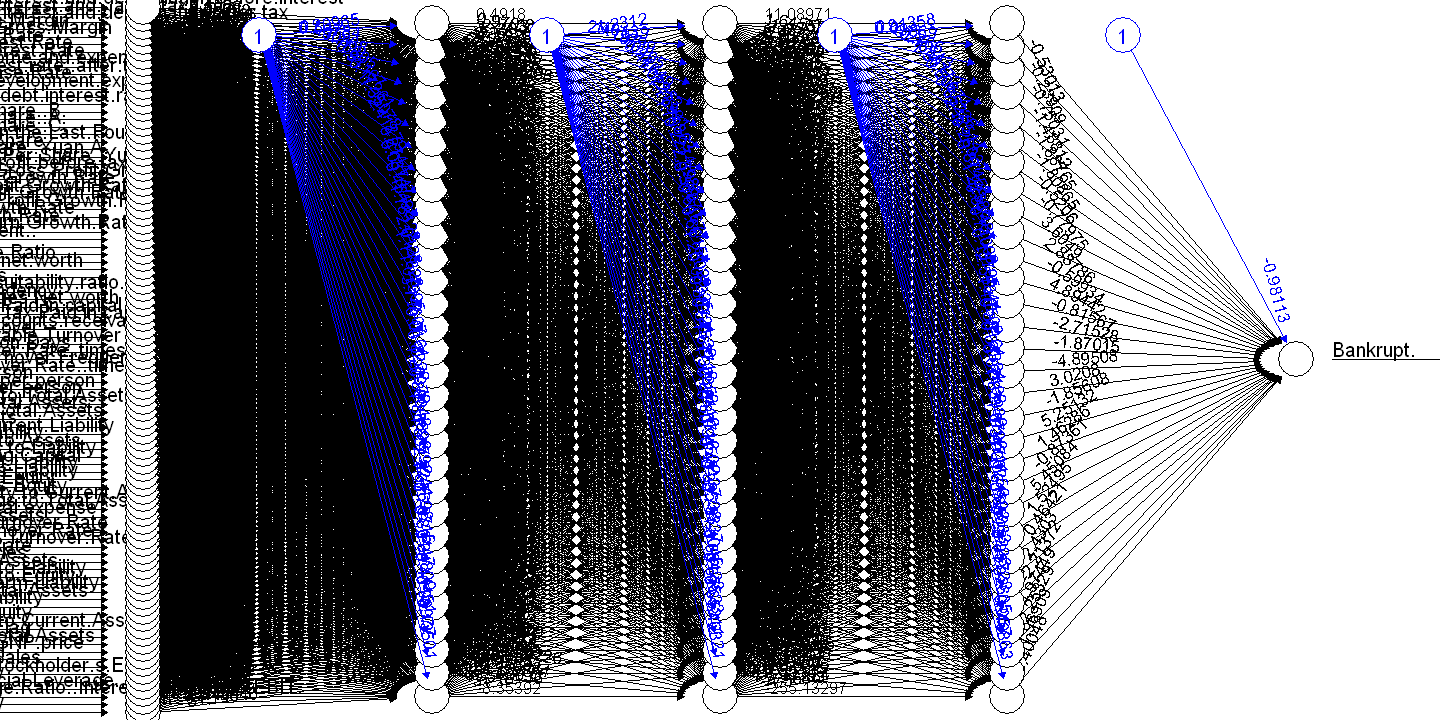

In [15]:
# Plot the neural network
options(repr.plot.width=12, repr.plot.height=6)
par(cex.lab=0.8, cex.axis=0.8, cex.main=0.8, cex.sub=0.8)

plot(nn_md1, rep="best")

In [16]:
# Make prediction and evaluation on train set
train_pred <- predict(nn_md1, data[train_idx, ])
train_pred <- apply(train_pred, 1, which.max)

table(data[train_idx, ]$Bankrupt., train_pred)

   train_pred
       1
  0 5279
  1  176

In [17]:
# Make prediction and evaluation on test set
test_pred <- predict(nn_md1, data[-train_idx, ])
test_pred <- apply(test_pred, 1, which.max)

table(data[-train_idx, ]$Bankrupt., test_pred)

   test_pred
       1
  0 1320
  1   44

In [68]:
# Error Rate
nn_md1$result.matrix

error,8.058351e+01
reached.threshold,9.044357e-03
steps,7.705000e+03
Intercept.to.1layhid1,2.096510e-01
ROA.C..before.interest.and.depreciation.before.interest.to.1layhid1,4.066020e-01
ROA.A..before.interest.and...after.tax.to.1layhid1,5.858202e-01
ROA.B..before.interest.and.depreciation.after.tax.to.1layhid1,-7.421561e-01
Operating.Gross.Margin.to.1layhid1,9.570848e-02
Realized.Sales.Gross.Margin.to.1layhid1,-9.465321e-01
Operating.Profit.Rate.to.1layhid1,1.522426e+00
Pre.tax.net.Interest.Rate.to.1layhid1,3.323804e+00


## Q4 Apply to 5 different models

#### Logistic Regression

In [19]:
# Logistic Regression
# Fit logistic regression model
md_logreg <- glm(Bankrupt. ~., data=data_train, family='binomial')
summary(md_logreg)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Bankrupt. ~ ., family = "binomial", data = data_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1126  -0.1481  -0.0679  -0.0279   3.6718  

Coefficients: (4 not defined because of singularities)
                                                          Estimate Std. Error
(Intercept)                                              1.230e+07  5.615e+08
ROA.C..before.interest.and.depreciation.before.interest -1.926e+01  1.353e+01
ROA.A..before.interest.and...after.tax                  -1.611e+00  9.384e+00
ROA.B..before.interest.and.depreciation.after.tax        1.882e+01  1.781e+01
Operating.Gross.Margin                                   1.075e+04  4.784e+04
Realized.Sales.Gross.Margin                              2.066e+01  1.768e+02
Operating.Profit.Rate                                   -8.776e+05  1.671e+06
Pre.tax.net.Interest.Rate                                7.342e+05  1.396e+06
After.tax.net.Interest.Rate                         

In [21]:
# Fit logistic regression model with only signiificant variables
md_logreg <- glm(Bankrupt. ~ Debt.ratio.. + Fixed.Assets.Turnover.Frequency + Net.Income.to.Total.Assets, data=data_train, family='binomial')
summary(md_logreg)


Call:
glm(formula = Bankrupt. ~ Debt.ratio.. + Fixed.Assets.Turnover.Frequency + 
    Net.Income.to.Total.Assets, family = "binomial", data = data_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.6713  -0.2205  -0.1341  -0.0803   3.3187  

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      7.301e+00  1.373e+00   5.316 1.06e-07 ***
Debt.ratio..                     2.131e+01  1.780e+00  11.975  < 2e-16 ***
Fixed.Assets.Turnover.Frequency  1.432e-10  2.630e-11   5.445 5.17e-08 ***
Net.Income.to.Total.Assets      -1.776e+01  1.687e+00 -10.527  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1555.0  on 5454  degrees of freedom
Residual deviance: 1094.4  on 5451  degrees of freedom
AIC: 1102.4

Number of Fisher Scoring iterations: 7


In [22]:
# Make prediction on both train and test data
pred_train_prob_logreg <- predict(md_logreg, newdata=data_train, type='response')
head(pred_train_prob_logreg)

pred_test_prob_logreg <- predict(md_logreg, newdata=data_test, type='response')
head(pred_test_prob_logreg)

1017        4775        2177        5026        1533        4567 
0.002368342 0.004433087 0.037134162 0.130473317 0.063711283 0.062116785

2           5           8          10          13          18 
0.044224481 0.010462386 0.007580680 0.012159569 0.020178734 0.003323788

In [24]:
# Evaluation model on train
threshold <- 0.5  # Decision threshold
pred_train_logreg <- rep(0, length(pred_train_prob_logreg))
pred_train_logreg[pred_train_prob_logreg > threshold] <- 1

# Confusion matrix
print('Confusion matrix:')
table(pred_train_logreg, data_train$Bankrupt.)

# Accuracy and error rate
acc_logreg <- mean(pred_train_logreg == data_train$Bankrupt.)
err_rate_logreg <- 1 - acc_logreg
print(paste('Accuracy =', round(acc_logreg, 2), '%'))
print(paste('Error =', round(err_rate_logreg, 2), '%'))

[1] "Confusion matrix:"


                 
pred_train_logreg    0    1
                0 5256  157
                1   23   19

[1] "Accuracy = 0.97 %"
[1] "Error = 0.03 %"


In [27]:
# Evaluation model on test
threshold <- 0.5  # Decision threshold
pred_test_logreg <- rep(0, length(pred_test_prob_logreg))
pred_test_logreg[pred_test_prob_logreg > threshold] <- 1

# Confusion matrix
print('Confusion matrix:')
table(pred_test_logreg, data_test$Bankrupt.)

# Accuracy and error rate
acc_logreg <- mean(pred_test_logreg == data_test$Bankrupt.)
err_rate_logreg <- 1 - acc_logreg
print(paste('Accuracy =', round(acc_logreg, 2), '%'))
print(paste('Error =', round(err_rate_logreg, 2), '%'))

[1] "Confusion matrix:"


                
pred_test_logreg    0    1
               0 1315   36
               1    5    8

[1] "Accuracy = 0.97 %"
[1] "Error = 0.03 %"


#### Linear Discriminant Analysis (LDA)

In [28]:
# Linear Discriminant Analysis (LDA)
md_lda <- lda(Bankrupt. ~ Debt.ratio.. + Fixed.Assets.Turnover.Frequency + Net.Income.to.Total.Assets, data=data_train)
md_lda

Call:
lda(Bankrupt. ~ Debt.ratio.. + Fixed.Assets.Turnover.Frequency + 
    Net.Income.to.Total.Assets, data = data_train)

Prior probabilities of groups:
         0          1 
0.96773602 0.03226398 

Group means:
  Debt.ratio.. Fixed.Assets.Turnover.Frequency Net.Income.to.Total.Assets
0    0.1103474                       979107653                  0.8100718
1    0.1860878                      2064975000                  0.7388718

Coefficients of linear discriminants:
                                          LD1
Debt.ratio..                     9.908454e+00
Fixed.Assets.Turnover.Frequency  5.420333e-11
Net.Income.to.Total.Assets      -1.899958e+01

In [29]:
# Predict and evaluate on test data
lda_pred <- predict(md_lda, newdata=data_test)
head(lda_pred$class)
head(lda_pred$posterior)

# Confusion matrix
print('Confusion matrix:')
table(lda_pred$class, data_test$Bankrupt.)

# Accuracy & Error Rate
acc_lda <- mean(lda_pred$class == data_test$Bankrupt.)
print(paste('Accuracy =', round(acc_lda, 2), '%'))
err_lda <- 1-acc_lda
print(paste('Error Rate =', round(err_lda, 2), '%'))

[1] 0 0 0 0 0 0
Levels: 0 1

,0,1
2,0.9793416,0.0206584288
5,0.9951157,0.0048842846
8,0.9977973,0.0022026523
10,0.9954004,0.0045995828
13,0.9921405,0.0078595094
18,0.9992623,0.0007377127


[1] "Confusion matrix:"


   
       0    1
  0 1305   33
  1   15   11

[1] "Accuracy = 0.96 %"
[1] "Error Rate = 0.04 %"


#### Quadratic Discriminant Analysis (QDA)

In [30]:
# Fit the QDA model on train set with 2 best predictors
md_qda <- qda(Bankrupt. ~ Debt.ratio.. + Fixed.Assets.Turnover.Frequency + Net.Income.to.Total.Assets, data=data_train)
md_qda

Call:
qda(Bankrupt. ~ Debt.ratio.. + Fixed.Assets.Turnover.Frequency + 
    Net.Income.to.Total.Assets, data = data_train)

Prior probabilities of groups:
         0          1 
0.96773602 0.03226398 

Group means:
  Debt.ratio.. Fixed.Assets.Turnover.Frequency Net.Income.to.Total.Assets
0    0.1103474                       979107653                  0.8100718
1    0.1860878                      2064975000                  0.7388718

## 

In [31]:
# Predict and evaluate on test data
qda_pred <- predict(md_qda, newdata=data_test)
head(qda_pred$class)
head(qda_pred$posterior)

# Confusion matrix
print('Confusion matrix:')
table(qda_pred$class, data_test$Bankrupt.)

# Accuracy
acc_qda <- mean(qda_pred$class == data_test$Bankrupt.)
print(paste('Accuracy =', round(acc_qda, 2), '%'))
err_qda <- 1-acc_qda
print(paste('Error Rate =', round(err_qda, 2), '%'))

[1] 0 0 0 0 0 0
Levels: 0 1

,0,1
2,0.9857302,0.014269784
5,0.9968525,0.003147488
8,0.9975388,0.002461211
10,0.9963047,0.003695335
13,0.9936595,0.006340542
18,0.9987739,0.001226059


[1] "Confusion matrix:"


   
       0    1
  0 1301   35
  1   19    9

[1] "Accuracy = 0.96 %"
[1] "Error Rate = 0.04 %"


#### K-Nearest Neighbors (KNN)

In [43]:
# k = 3
set.seed(123)
knn1_pred <- knn(train=data_train[, c('Debt.ratio..', 'Fixed.Assets.Turnover.Frequency','Net.Income.to.Total.Assets')],
                 test=data_test[, c('Debt.ratio..', 'Fixed.Assets.Turnover.Frequency','Net.Income.to.Total.Assets')],
                 cl=data_train$Bankrupt.,
                 k=5)

# Confusion matrix
print('Confusion matrix:')
table(knn1_pred, data_test$Bankrupt.)

# Accuracy & Error Rate
acc_knn1 <- mean(knn1_pred == data_test$Bankrupt.)
print(paste('Accuracy =', round(acc_knn1, 2), '%'))
err_knn1 <- 1-acc_knn1
print(paste('Error Rate =', round(err_knn1, 2), '%'))

[1] "Confusion matrix:"


         
knn1_pred    0    1
        0 1311   37
        1    9    7

[1] "Accuracy = 0.97 %"
[1] "Error Rate = 0.03 %"


#### Regression Trees

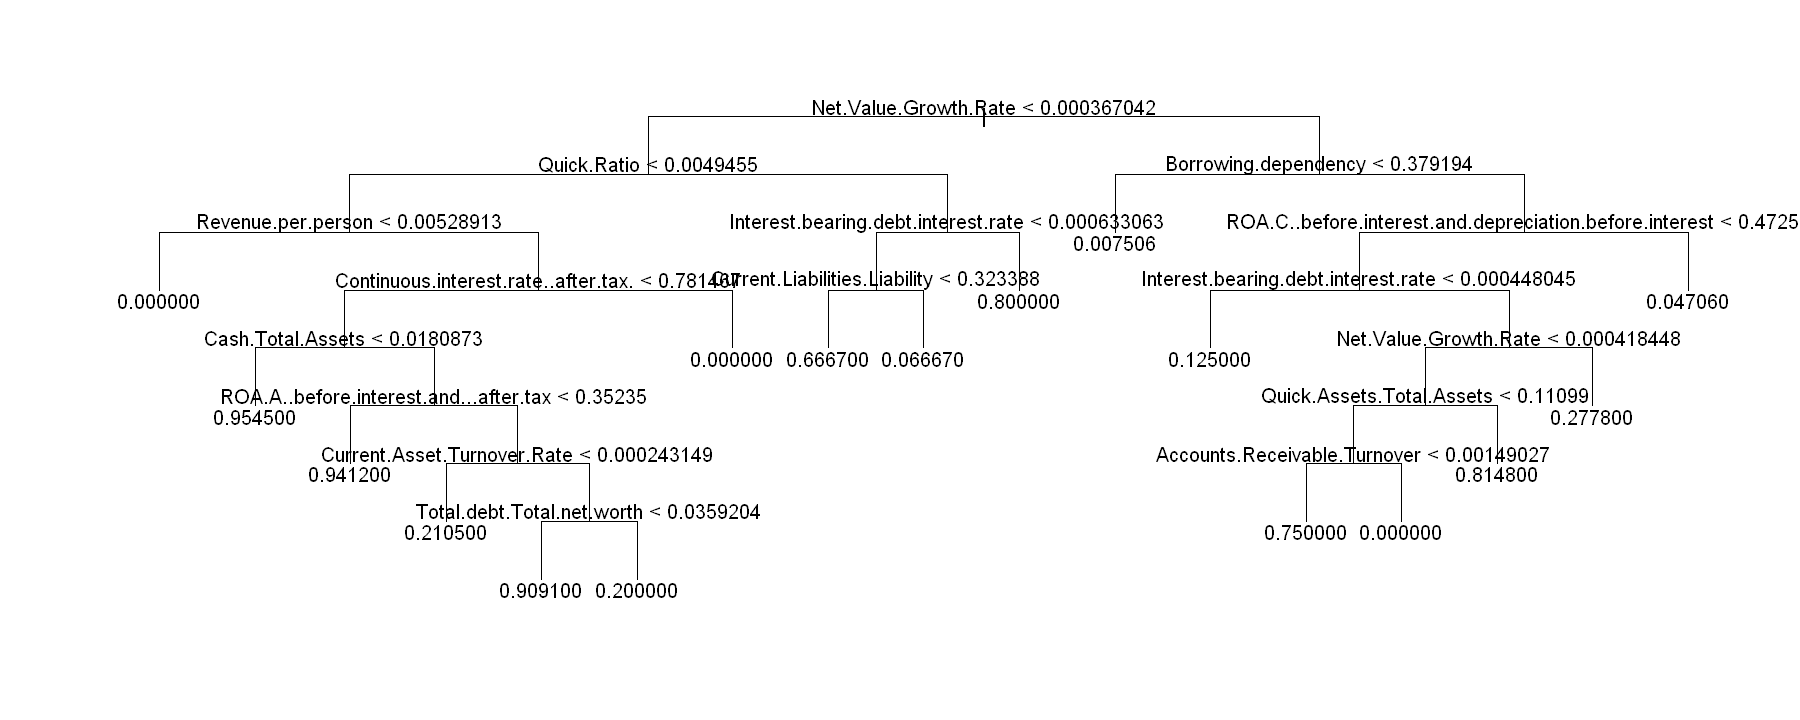

In [50]:
# Fit full regression tree (top-down greedy splitting)
md_regtree <- tree(Bankrupt. ~ ., data=data_train)

# Plot the regression tree
options(repr.plot.width=15, repr.plot.height=6)
plot(md_regtree, type='uniform')
text(md_regtree, pretty=0)

In [51]:
# Print out the tree details
md_regtree

node), split, n, deviance, yval
      * denotes terminal node

  1) root 5455 170.3000 0.032260  
    2) Net.Value.Growth.Rate < 0.000367042 148  36.1800 0.425700  
      4) Quick.Ratio < 0.0049455 92  22.6100 0.565200  
        8) Revenue.per.person < 0.00528913 12   0.0000 0.000000 *
        9) Revenue.per.person > 0.00528913 80  18.2000 0.650000  
         18) Continuous.interest.rate..after.tax. < 0.781467 74  15.4600 0.702700  
           36) Cash.Total.Assets < 0.0180873 22   0.9545 0.954500 *
           37) Cash.Total.Assets > 0.0180873 52  12.5200 0.596200  
             74) ROA.A..before.interest.and...after.tax < 0.35235 17   0.9412 0.941200 *
             75) ROA.A..before.interest.and...after.tax > 0.35235 35   8.5710 0.428600  
              150) Current.Asset.Turnover.Rate < 0.000243149 19   3.1580 0.210500 *
              151) Current.Asset.Turnover.Rate > 0.000243149 16   3.4380 0.687500  
                302) Total.debt.Total.net.worth < 0.0359204 11   0.9091 0.909100 

In [49]:
# Make the prediction
set.seed(2)
pred_dt <- predict(md_tree, newdata=data_test, type='b')
pred_proba_dt <- predict(md_tree, newdata=data_test, type='vector')[, 'Yes']

# Evaluation: confusion matrix
table(pred_dt, data_test$High)

# Accuracy & Error Rate
print(paste0('Acuracy = ', mean(pred_dt == data_test$High)))
err_dt = 1-mean(pred_dt == data_test$High)
print(paste0('Error Rate = ', err_dt))

ERROR: Error in match.arg(type): 'arg' should be one of "vector", "tree", "class", "where"


In [52]:
# Prune the Regression Tree #Cross Validation (delete one by one) -->
set.seed(1)
cv_regtree <- cv.tree(md_regtree)
cv_regtree

$size
 [1] 17 16 15 14 13 11 10  9  8  7  6  5  4  3  2  1

$dev
 [1] 158.7511 156.8779 159.2233 157.7009 157.7009 152.1652 152.1652 152.1652
 [9] 152.2093 150.0857 141.9450 143.6347 142.8550 151.8846 152.6397 170.4112

$k
 [1]      -Inf  1.728409  1.905882  1.976034  2.000070  2.496154  2.500000
 [8]  2.503704  2.740541  2.912121  4.408696  4.734451  5.191037  6.854702
[15]  7.303844 23.545175

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

In [53]:
# Best tree size
min_idx <- which.min(cv_regtree$dev)
tree_size <- cv_regtree$size[min_idx]
tree_dev <- cv_regtree$dev[min_idx]
tree_k <- cv_regtree$k[min_idx]

print(paste0('Best tree size = ', tree_size))
print(paste0('Best RSS = ', tree_dev))
print(paste0('Best alpha = ', tree_k))

[1] "Best tree size = 6"
[1] "Best RSS = 141.944993635206"
[1] "Best alpha = 4.40869565217389"


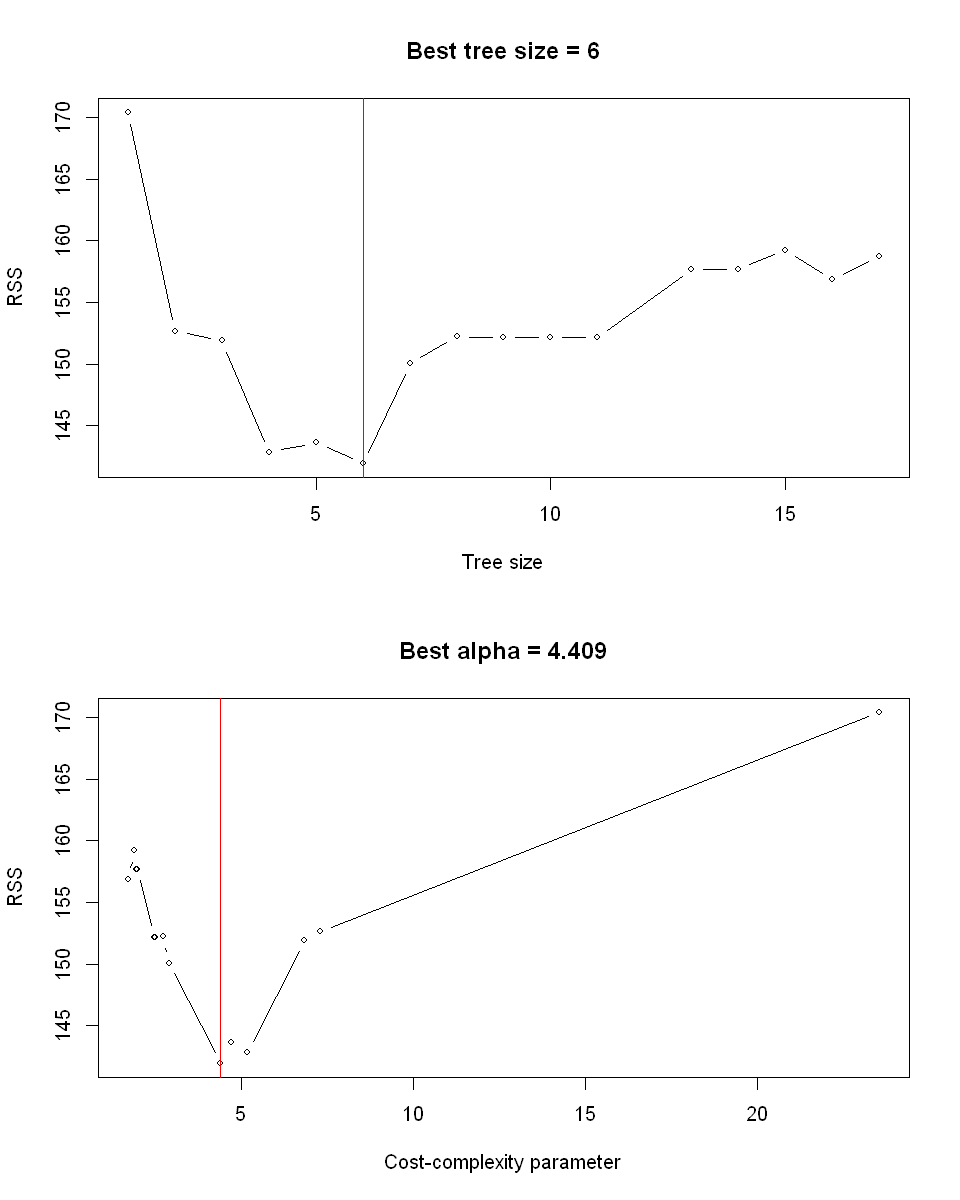

In [54]:
# Show the Decision Tree
options(repr.plot.width=8, repr.plot.height=10)
par(mfrow=c(2, 1))

# Tree size, number of nodes
plot(cv_regtree$size, cv_regtree$dev, type='b', cex=0.7,
     xlab='Tree size', ylab='RSS', main=paste0('Best tree size = ', tree_size)
    )
abline(v=tree_size, col='red')  # Best tree size

# Cost-complexity param, alpha
plot(cv_regtree$k, cv_regtree$dev, type='b', cex=0.7,
     xlab='Cost-complexity parameter', ylab='RSS',
     main=paste0('Best alpha = ', round(tree_k, 3))
    )
abline(v=tree_k, col='red')  # Best tree size

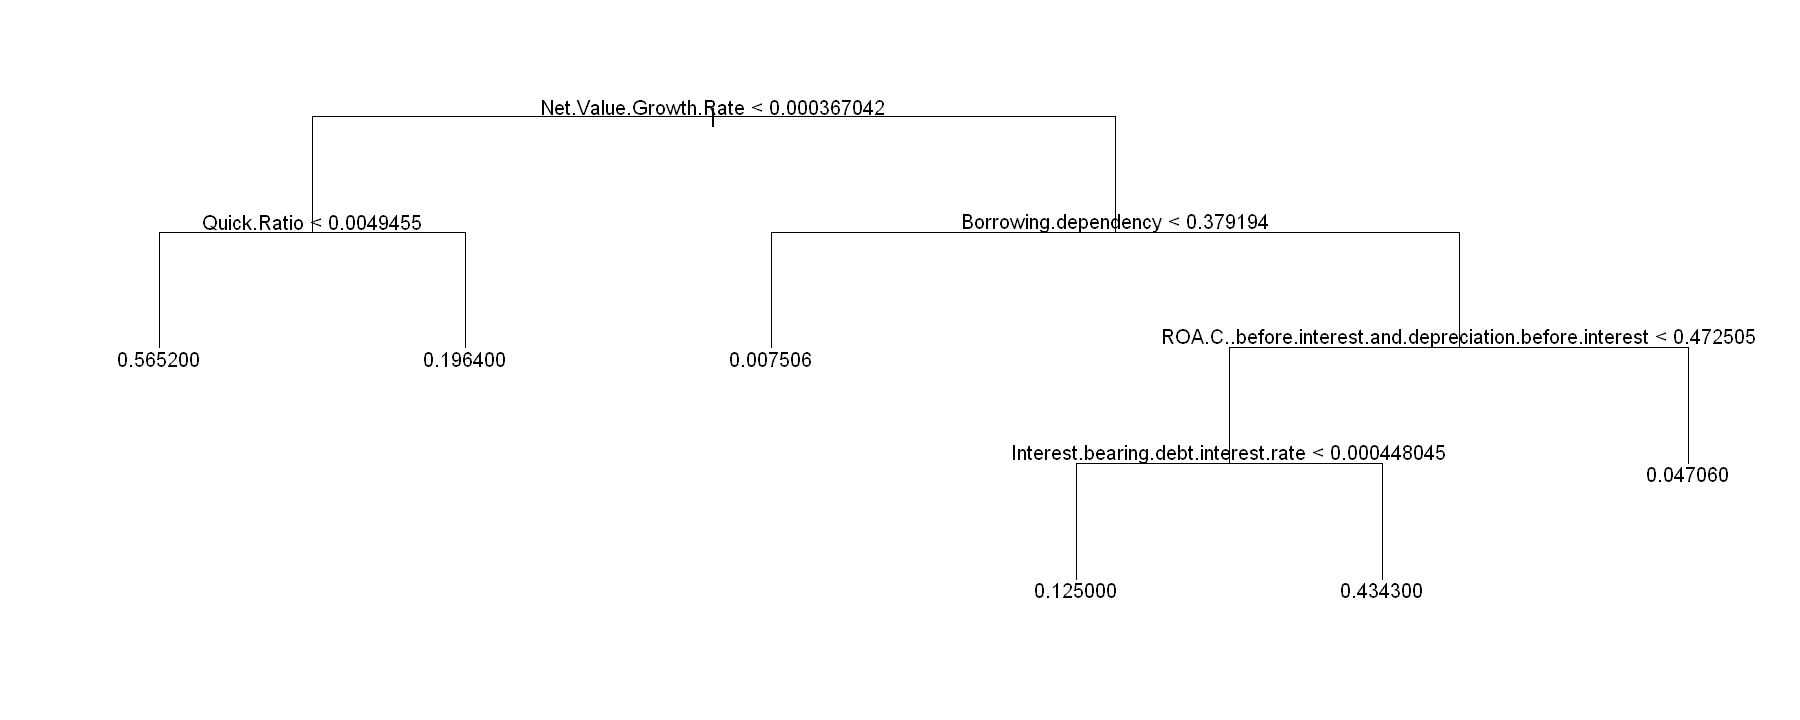

In [55]:
# Prune the tree
prune_regtree <- prune.tree(md_regtree, best=6)

# Show the tree
options(repr.plot.width=15, repr.plot.height=6)
plot(prune_regtree, type='uniform')
text(prune_regtree, pretty=0)

In [57]:
# RSS full Regression Tree
pred_full_regtree <- predict(md_regtree, newdata=data_test)
mse_full_regtree <- mean((pred_full_regtree - mean(data_test$Bankrupt.)) ^ 2)
mse_full_regtree

# RSS pruned Regression Tree
pred_pruned_regtree <- predict(prune_regtree, newdata=data_test)
mse_pruned_regtree <- mean((pred_pruned_regtree - mean(data_test$Bankrupt.)) ^ 2)
mse_pruned_regtree

[1] 0.01334323

[1] 0.008820495